In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, matutils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthew.redmond@usfoods.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
df = pd.read_csv("Onion_NYT.csv")
df['Title'] = df['Title'].astype(str)
df['Content'] = df['Content'].astype(str)
df['spacy_Title'] = list(nlp.pipe(df['Title']))
df['spacy_Content'] = list(nlp.pipe(df['Content']))
spstopwords = nlp.Defaults.stop_words
#https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy
df['Spacy_Title2'] = df.Title.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
df['Spacy_Content2'] = df.Content.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
titlelistforcv = []
for doc in df.Spacy_Title2:
    titlelistforcv.append(doc)
contentlistforcv = []
for doc in df.Spacy_Content2:
    contentlistforcv.append(doc)

In [59]:
cv = CountVectorizer()
X_title = cv.fit_transform(titlelistforcv)
df2 = pd.DataFrame(X_title.toarray(),columns=cv.get_feature_names())
df2.columns

Index(['000', '00000000001', '00003', '000th', '004', '06', '08', '081', '10',
       '100',
       ...
       'zwirner', 'álvarez', 'élysées', 'émigré', 'éric', 'état', 'étoile',
       'óscar', 'özil', 'ünited'],
      dtype='object', length=26036)

In [60]:
cv2 = CountVectorizer()
X_content = cv2.fit_transform(contentlistforcv)
df_cont = pd.DataFrame(X_content.toarray(),columns=cv2.get_feature_names())
df_cont.columns

Index(['00', '000', '0000', '00000000001', '0000000001', '00000029', '000001',
       '000002', '000017935', '00003',
       ...
       'ÿ2', '作者价值', '奈苗', '平台价值', '東京', '用户价值', '美苗', '长期', '閱讀繁體中文版',
       '阅读简体中文版'],
      dtype='object', length=57529)

In [62]:
corpus = matutils.Sparse2Corpus(X_title)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
ld = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2word)

IndexError: index 26157 is out of bounds for axis 1 with size 26036

In [63]:
corpus2 = matutils.Sparse2Corpus(X_content)
id2word2 = dict((v, k) for k, v in cv2.vocabulary_.items())
ld2 = models.LdaModel(corpus=corpus2, num_topics=2, id2word=id2word2)

In [64]:
lda_title_data = [doc for doc in ld[corpus]]
lda_content_data = [doc for doc in ld2[corpus2]]

In [65]:
df4 = pd.DataFrame(lda_title_data, columns = ['lda_topic_1','lda_topic_2'])
df5 = pd.DataFrame(lda_content_data, columns = ['lda_topic_1','lda_topic_2']) 

In [66]:
df4[['del1', 'lda_topic_1']] = pd.DataFrame(df4['lda_topic_1'].tolist(), index=df4.index)
df4[['del1', 'lda_topic_2']] = pd.DataFrame(df4['lda_topic_2'].tolist(), index=df4.index)
df5[['del1', 'lda_topic_1']] = pd.DataFrame(df5['lda_topic_1'].tolist(), index=df5.index)
df5[['del1', 'lda_topic_2']] = pd.DataFrame(df5['lda_topic_2'].tolist(), index=df5.index)

In [67]:
df4 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = pd.merge(df, df5, left_index=True, right_index=True)

In [19]:
df4

,Onion,Title,Published Time,Content,spacy_Title,spacy_Content,Spacy_Title2,Spacy_Content2,lda_topic_1,lda_topic_2,del1
0,0,Misogyny Fuels Violence Against Women. Should ...,2021-03-26 00:31:15+00:00,"Caroline Criado Perez, author of “Invisible...","(Misogyny, Fuels, Violence, Against, Women, .,...","( , Caroline, Criado, Perez, ,, author, of, ...",Misogyny Fuels Violence Women . Hate Crime ?,"Caroline Criado Perez , author "" invisible...",0.536241,0.463759,1.0
1,0,‘No Time to Be a Child’,2021-09-25 18:58:22+00:00,"A poem by Azariah Baker, a high school stude...","(‘, No, Time, to, Be, a, Child, ’)","( , A, poem, by, Azariah, Baker, ,, a, high, ...",' time child ',"poem Azariah Baker , high school student Ch...",0.739351,0.260649,1.0
2,0,"His, Hers, Everyone’s: Gender-Equal Underwear ...",2021-06-25 21:18:24+00:00,"Abby Sugar, co-founder and chief executive o...","(His, ,, Hers, ,, Everyone, ’s, :, Gender, -, ...","( , Abby, Sugar, ,, co, -, founder, and, chie...",", , : Gender - Equal Underwear go ( slightly )...","Abby Sugar , co - founder chief executive P...",0.734301,0.265699,1.0
3,0,A Fashion Show With an Unexpected Focus: Sexua...,2021-09-12 19:01:31+00:00,"Amanda Nguyen, founder of the civil rights o...","(A, Fashion, Show, With, an, Unexpected, Focus...","( , Amanda, Nguyen, ,, founder, of, the, civi...",Fashion Unexpected Focus : Sexual Assault surv...,"Amanda Nguyen , founder civil right organiz...",0.821345,0.178655,1.0
4,0,"Hey, Alexa, Are You Sexist?",2021-02-12 21:20:20+00:00,Amazon’s Alexa,"(Hey, ,, Alexa, ,, Are, You, Sexist, ?)","( , Amazon, ’s, Alexa)","hey , Alexa , sexist ?",Amazon Alexa,0.707954,0.292047,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26031,0,Biden deploys federal resources to devastated ...,2021-12-11 17:48:23+00:00,President Biden directed that federal resource...,"(Biden, deploys, federal, resources, to, devas...","(President, Biden, directed, that, federal, re...",Biden deploy federal resource devastate area .,"President Biden direct federal resource "" surg...",0.749180,0.250820,1.0
26032,0,Biden Tells OSHA to Issue New Covid-19 Guidanc...,2021-01-21 18:35:57+00:00,President Biden directed the Occupational Safe...,"(Biden, Tells, OSHA, to, Issue, New, Covid-19,...","(President, Biden, directed, the, Occupational...",Biden tell OSHA issue New Covid-19 Guidance Em...,President Biden direct Occupational Safety Hea...,0.267575,0.732425,1.0
26033,0,"Biden Highlights Small-Business Help, as Probl...",2021-03-16 23:07:23+00:00,President Biden dropped by a flooring company ...,"(Biden, Highlights, Small, -, Business, Help, ...","(President, Biden, dropped, by, a, flooring, c...","Biden Highlights Small - Business help , probl...",President Biden drop floor company Philadelphi...,0.409756,0.590244,1.0
26034,0,"Biden, sliding in the polls, pivoted back to a...",2021-09-14 15:46:04+00:00,President Biden embraced Gov. Gavin Newsom’s g...,"(Biden, ,, sliding, in, the, polls, ,, pivoted...","(President, Biden, embraced, Gov., Gavin, News...","Biden , slide poll , pivot attack trump Califo...",President Biden embrace Gov. Gavin Newsom - po...,0.315057,0.684943,1.0


In [68]:
X = df4.iloc[:,8:10]
y = df4["Onion"]

In [30]:
print(X)
pd.options.display.max_rows = None
print(X)

       lda_topic_1  lda_topic_2
0         0.662060     0.337940
1         0.505065     0.494935
2         0.804944     0.195056
3         0.739385     0.260615
4         0.424400     0.575600
...            ...          ...
43456     0.741956     0.258044
43457     0.442861     0.557139
43458     0.260733     0.739267
43459     0.175479     0.824521
43460     0.738514     0.261486

[43461 rows x 2 columns]
       lda_topic_1  lda_topic_2
0         0.662060     0.337940
1         0.505065     0.494935
2         0.804944     0.195056
3         0.739385     0.260615
4         0.424400     0.575600
5         0.259856     0.740144
6         0.424422     0.575578
7         0.259223     0.740777
8         0.271011     0.728989
9         0.734320     0.265680
10        0.480943     0.519057
11        0.258744     0.741256
12        0.707982     0.292018
13        0.703613     0.296387
14        0.845684     0.154316
15        0.259295     0.740704
16        0.402074     0.597926
17        0.70

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [70]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
#Title NMF Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<AxesSubplot:>

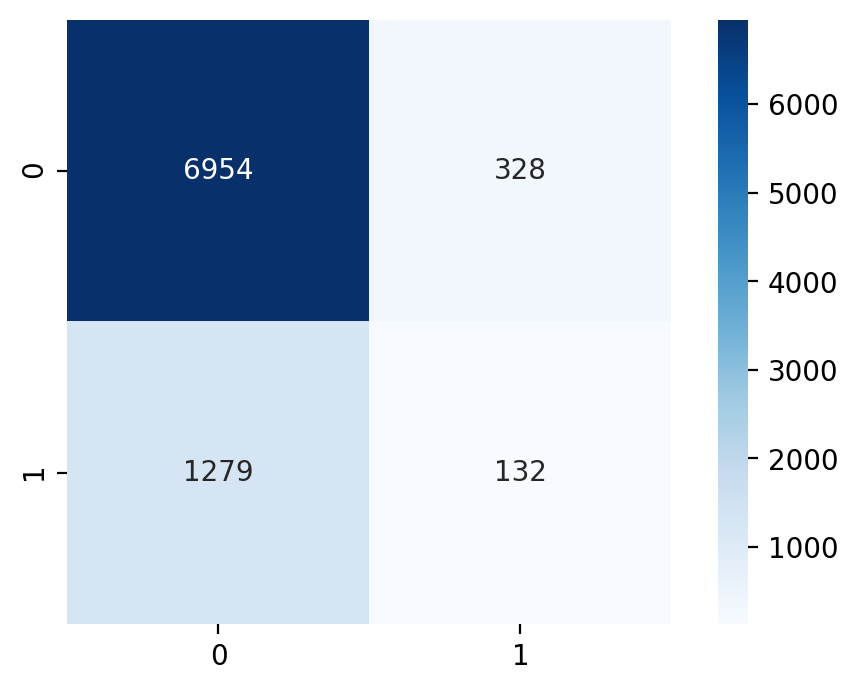

In [17]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [31]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)
#Title NMF Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8374554239042908
0.25
0.0007087172218284905
0.001413427561837456


<AxesSubplot:>

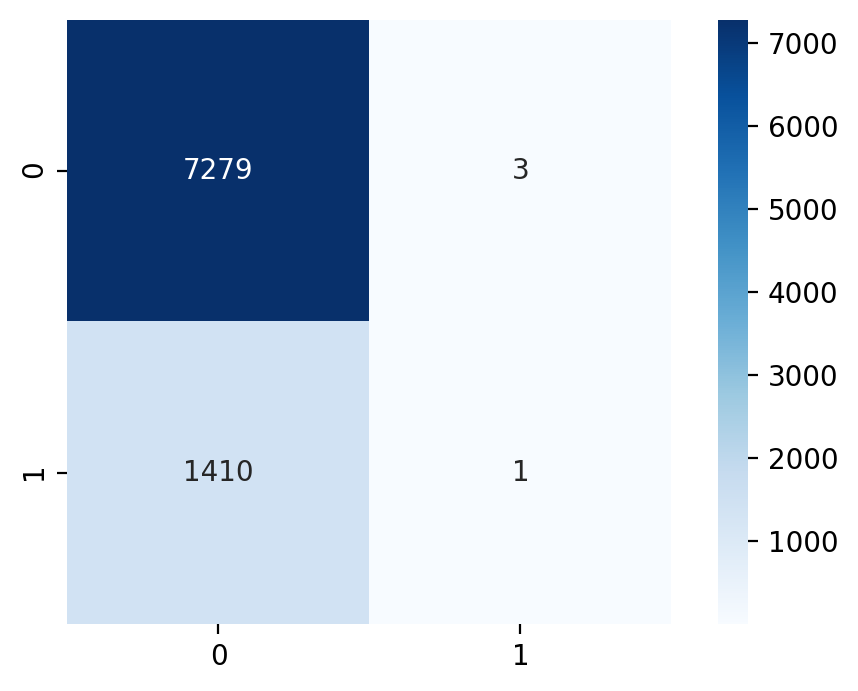

In [32]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [71]:
X = df5.iloc[:,8:10]
y = df5["Onion"]

In [74]:
X = X.fillna(0)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [76]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
#Content NMF Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.7308178994593351
0.15719557195571957
0.15095676824946846
0.1540130151843818


<AxesSubplot:>

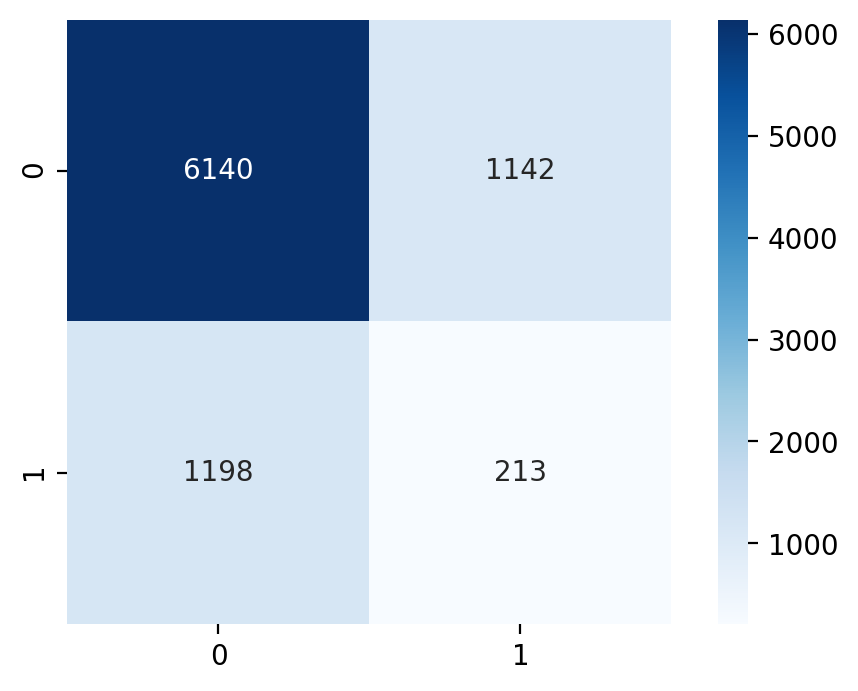

In [77]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [78]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)
#Content NMF Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8379155642470953
0.75
0.002126151665485471
0.004240282685512367


<AxesSubplot:>

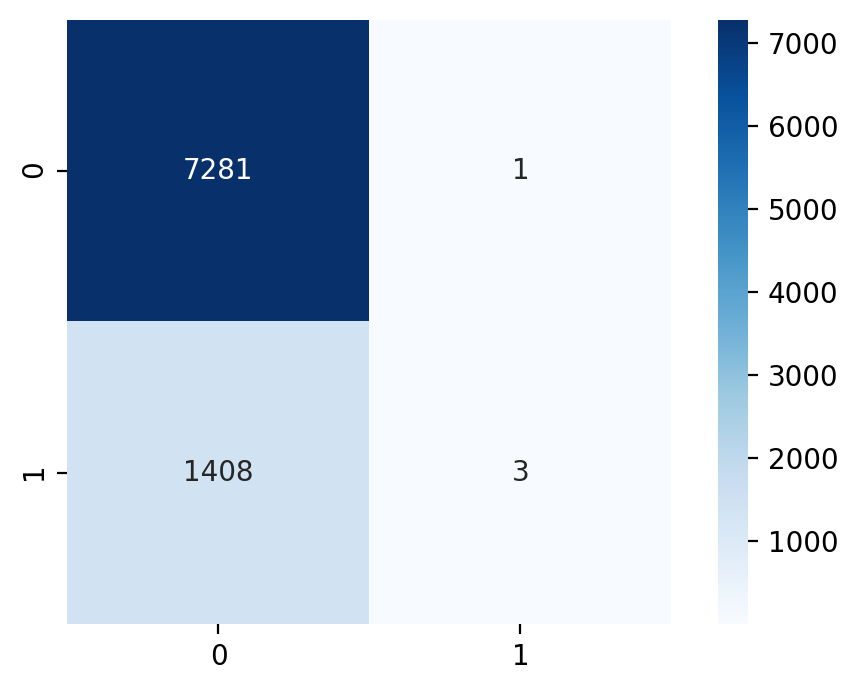

In [79]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [84]:
num_clusters = 2
km = KMeans(n_clusters = num_clusters, random_state=10, n_init=10)
km.fit(X)

KMeans(n_clusters=2, random_state=10)

In [85]:
result = km.predict(X_test)
#Content LSA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.6295870240423329
0.14571092831962398
0.26364280652019845
0.1876892028254289


<AxesSubplot:>

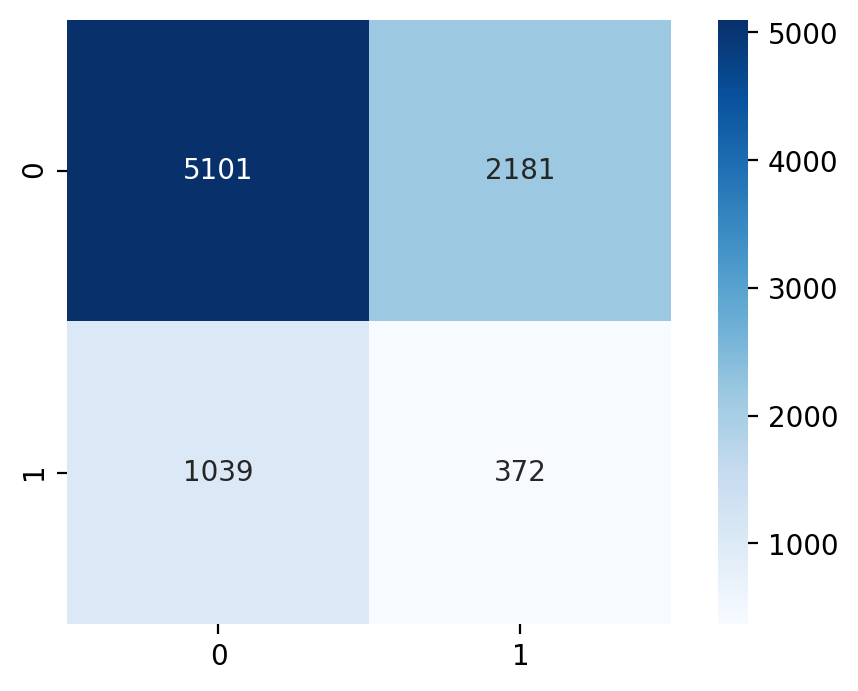

In [86]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")